In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

%matplotlib notebook


plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
plt.rcParams["figure.autolayout"] = True

Period HST=95.1931542762587   Period ISS=95.1931542762587
Rhst=6906000.0  f=0.033416546116890856  vt=7509.572004515914  Dv=-87.55653224417165(-315.20351607901796 km/h)
e: 0.022917077014525836   ef: 6747734.666137671


<IPython.core.display.Javascript object>


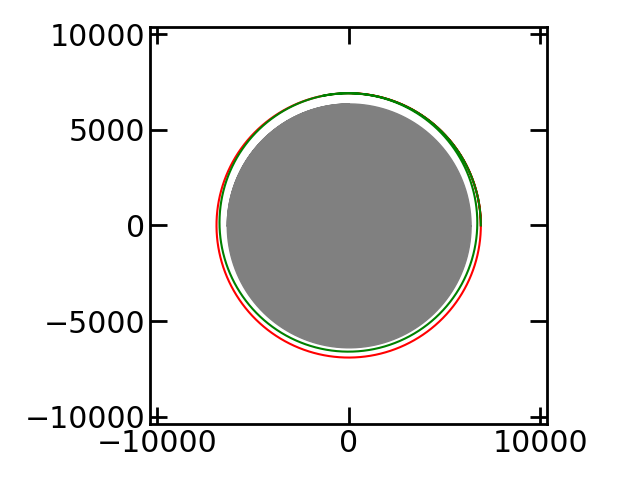

In [2]:
RE = 6371.0e+3
h_hst = 535.0e+3
h_iss = 400.0e+3
h_iss = h_hst
muE = 5.972*6.67430e+13
Rhst = RE+h_hst
Riss = RE+h_iss
v_hst = np.sqrt(muE/Rhst)
v_iss = np.sqrt(muE/Riss)

dist = 1450.0e3

f = dist/(2.0*np.pi*Riss)
dphi = dist/Riss

niss = 1
nsbgc = 1

npt=200
norb = niss*1.25
dvnorm = -0.0175475
#dvnorm = -0.4


phi_off = np.pi/2.0
#phi_off =0.0

sb = Rhst*1.5/1.0e3

def a_catch(niss,nsbgc,f,Riss):
    return Riss*((niss-f)/nsbgc)**(2./3.)

def v_catch(Riss,mu,a):
    return np.sqrt(2.0*mu/Riss-mu/a)

# semimajor axis
def a(r0,v0,mu):
    return r0/(2.0-r0*v0*v0/mu)

# mechanical energy
def etotm(a, mu):
    return -mu/(2.*a)

def emech(r,v,mu):
    return v*v/2.0-mu/r

# angular momentum
def ltotm(r, vt):
    return r*vt

def dadt(r,vt,dt):
    return r*vt*dt/2.0

def e(em,lm,mu):
    return np.sqrt(1.0+2.0*em*lm*lm/mu/mu)

def ef(lm,mu):
    return lm*lm/mu

def rtkep_ef(e,ef,theta):
    return ef/(1.0+e*np.cos(theta))


def rtkep(mu,lm,em,theta):
    return (1.0/((mu/lm/lm)*(np.sqrt(1.0+2.0*em*lm*lm/mu/mu)*np.cos(theta)+1.0)))

def dtheta(r,da):
    return 2.0*da/r/r


Phst = np.sqrt(4.*np.pi*np.pi*Rhst*Rhst*Rhst/muE)
Piss = np.sqrt(4.*np.pi*np.pi*Riss*Riss*Riss/muE)
print("Period HST={0}   Period ISS={1}".format(Phst/60.,Piss/60.))

at = a_catch(niss,nsbgc,f,Riss)
vt = v_catch(Riss,muE,at)
print("Rhst={0}  f={1}  vt={2}  Dv={3}({4} km/h)".format(Rhst,f,vt,(vt-v_hst),(vt-v_hst)*3600./1.e3))

phi = np.linspace(0,norb*2.0*np.pi,npt)-phi_off

dt = norb*Phst/float(npt)

da_hst = dadt(Rhst,v_hst,dt)
em_hst = etotm(Rhst, muE)
lm_hst = ltotm(Rhst, v_hst)

ro_hst = Rhst*np.ones(len(phi))
th_hst = np.copy(phi)

da_iss = dadt(Riss,v_iss,dt)
em_iss = etotm(Riss, muE)
lm_iss = ltotm(Riss, v_iss)

ro_iss = Riss*np.ones(len(phi))
th_iss = np.copy(phi)


r0 = Rhst
v0t = v_hst*(1.+dvnorm)
#v0t = v_hst-0.01*v_hst
v0t = vt

da_sbgc = dadt(r0,v0t,dt)
em_sbgc = etotm(r0, muE)
em_sbgc = emech(r0,v0t,muE)
lm_sbgc = ltotm(r0, v0t)

ro_sbgc = r0*np.ones(len(phi))
th_sbgc = np.copy(phi+np.pi)
e_sbgc = e(em_sbgc,lm_sbgc,muE)
ef_sbgc = ef(lm_sbgc,muE)
print("e: {0}   ef: {1}".format(e_sbgc,ef_sbgc))


for i in range(len(phi)):
    if phi[i]>=0.:
        th_hst[i] = th_hst[i-1]+dtheta(ro_hst[i-1],da_hst)
        th_iss[i] = th_iss[i-1]+dtheta(ro_iss[i-1],da_iss)
        th_sbgc[i] = th_sbgc[i-1]+dtheta(ro_sbgc[i-1],da_sbgc)
        #ro_hst[i] = rtkep(muE,lm_hst,em_hst,th_hst[i])
        ro_hst[i] = rtkep(muE,lm_hst,em_hst,th_hst[i])
        ro_iss[i] = rtkep(muE,lm_iss,em_iss,th_iss[i])
        #ro_sbgc[i] = rtkep(muE,lm_sbgc,em_sbgc,th_sbgc[i])
        ro_sbgc[i] = rtkep_ef(e_sbgc,ef_sbgc,phi[i]-np.pi)


xhst = -Rhst*np.sin(phi)/1.e3
yhst = Rhst*np.cos(phi)/1.e3

xiss = -Rhst*np.sin(phi+dphi)/1.e3
yiss = Rhst*np.cos(phi+dphi)/1.e3

xo_hst = -ro_hst*np.sin(th_hst)/1.e3
yo_hst = ro_hst*np.cos(th_hst)/1.e3

xo_iss = -ro_iss*np.sin(th_iss)/1.e3
yo_iss = ro_iss*np.cos(th_iss)/1.e3

x_sbgc = -ro_sbgc*np.sin(th_sbgc-np.pi)/1.e3
y_sbgc = ro_sbgc*np.cos(th_sbgc-np.pi)/1.e3
#x_sbgc = np.copy(xo_hst)
#y_sbgc = np.copy(yo_hst)


fig,ax = plt.subplots()
ax.set_xlim(-sb,sb)
ax.set_ylim(-sb,sb)
ax.set_box_aspect(1)

plt.fill_between(RE*np.sin(phi)/1.e3,RE*np.cos(phi)/1.e3,color='grey')
plt.plot(xo_hst,yo_hst,color='r')
plt.plot(x_sbgc,y_sbgc,color='g')

plt.show()

<IPython.core.display.Javascript object>


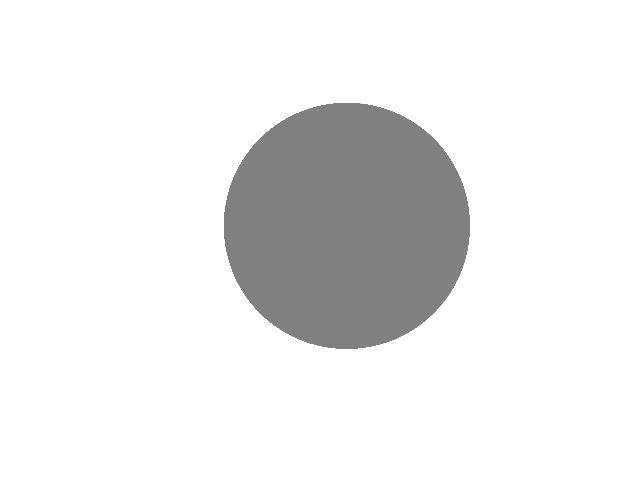

In [3]:
fig, ax = plt.subplots()

line_hst, = ax.plot([],'o',color='red')     # A tuple unpacking to unpack the only plot
line_iss, = ax.plot([],'s',color='blue')
line_sbgc, = ax.plot([],'2',color='green')

ax.set_xlim(-sb,sb)
ax.set_ylim(-sb,sb)
ax.set_box_aspect(1)


def init():
    ax.fill_between(RE*np.sin(phi)/1.e3,RE*np.cos(phi)/1.e3,color='grey')
    line_hst.set_data([], [])
    return line_hst,

def animate(i):
    #
    line_hst.set_data((xo_hst[i], yo_hst[i]))
    #
    line_iss.set_data((xiss[i], yiss[i]))
    #
    line_sbgc.set_data((x_sbgc[i], y_sbgc[i]))
    #line_sbgc.set_data((xiss[i], yiss[i]))
    return line_hst

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=npt, interval=20, blit=True)


#xhst = Rhst*np.cos(phi)
#yhst = Rhst*np.sin(phi)

anim.save('sbgc_from_hst_to_iss.mp4', writer='ffmpeg', fps=20)

#t = np.linspace(0,P,npt)

<IPython.core.display.Javascript object>


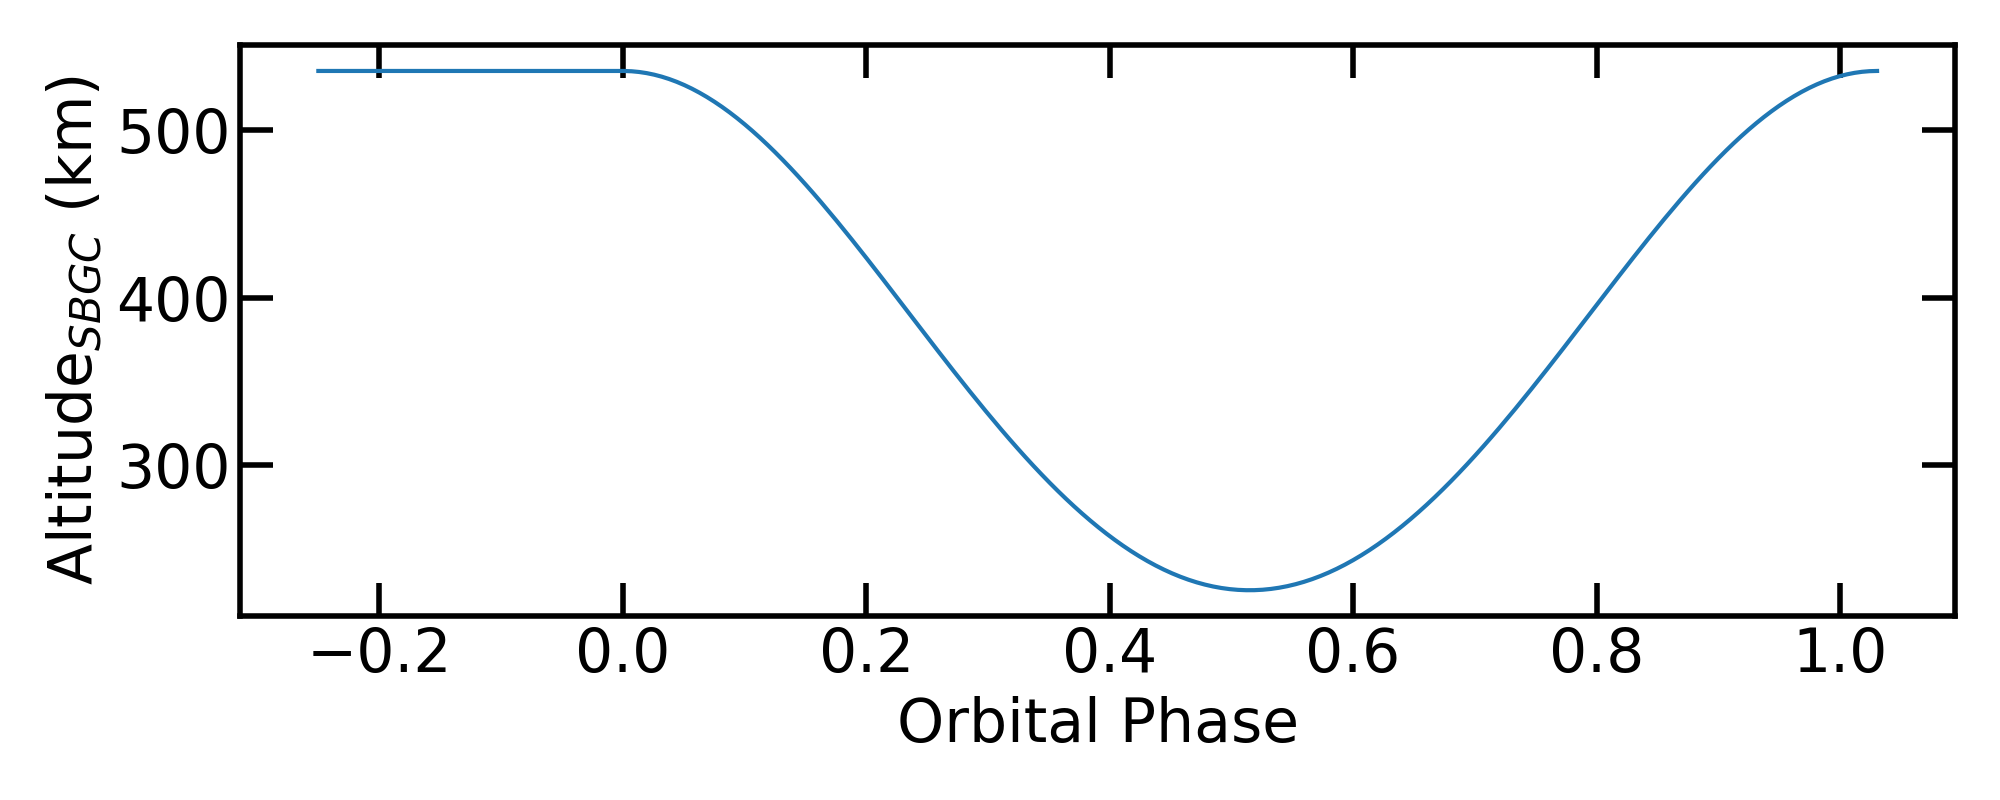

In [4]:
fig=plt.figure(figsize=(10,4))
plt.plot((th_sbgc-np.pi)/2.0/np.pi,(ro_sbgc-RE)/1.e3)
plt.ylabel(r'Altitude$_{SBGC}$ (km)')
plt.xlabel(r'Orbital Phase')

plt.savefig('f_altitude.pdf')
